# 9. Segment images using cellpose

In this notebook we'll be applying the Cellpose algorithm to segment the cells in the images. Cellpose is a deep learning algorithm that can be used to segment cells in images.

In [1]:
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models

This is a function to rea the third channel of an image and downscale it. Use the function to read one of the tif images in the 'images' folder and display it. 

```python
def read_and_scale_image(image_path):
    image = skimage.io.imread(image_path)
    image = image[:, :, 2]
    image = image[::4, :: 4]
    return image
```

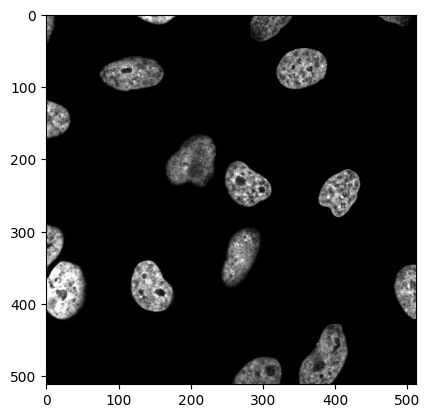

In [2]:
def read_and_scale_image(image_path):
    image = skimage.io.imread(image_path)
    image = image[:, :, 2]
    image = image[::4, :: 4]
    return image

image = read_and_scale_image('images/46658_784_B12_1.tif')
plt.imshow(image, cmap='gray')

Use the following function to segment the nuclei in the image.

Display the segmentation masks using `stackview.curtain(image, masks)`

```python
def segment_image(image):
    model = models.Cellpose(gpu=False, model_type='nuclei')
    masks, flows, styles, diams = model.eval(image, diameter=150, channels=[0, 0])
    return masks
```

In [3]:
def segment_image(image):
    model = models.Cellpose(gpu=False, model_type='nuclei')
    masks, flows, styles, diams = model.eval(image, diameter=150, channels=[0, 0])
    return masks

masks = segment_image(image)

/Users/malbert/miniconda3/envs/pyimagecourse/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

In [4]:
import stackview

stackview.curtain(image, masks)

How could you improve the segmentation output? Hint: Look at the diameter.

In [5]:
def segment_image(image):
    model = models.Cellpose(gpu=False, model_type='nuclei')
    masks, flows, styles, diams = model.eval(image, diameter=50, channels=[0, 0])
    return masks

masks = segment_image(image)
stackview.curtain(image, masks)

Use the following code to create a list of all the images in the 'images' folder and print the list.

```python
image_path_list = [p for p in os.listdir('images') if p.endswith('.tif')]
```

In [6]:
image_path_list = [p for p in os.listdir('images') if p.endswith('.tif')]
image_path_list

['27985_284_E10_2.tif',
 '24138_196_F7_2.tif',
 '50546_727_A8_2.tif',
 '67703_1283_D7_3.tif',
 '47549_736_E7_1.tif',
 '19838_1252_F8_1.tif',
 '8346_22_C1_1.tif',
 '47032_977_G4_4.tif',
 '37367_517_E4_2.tif',
 '36268_407_B8_1.tif',
 '64554_1164_A6_2.tif',
 '60398_1596_E1_1.tif',
 '46658_784_B12_1.tif',
 '27897_273_C8_2.tif',
 '36268_404_B8_2.tif']

Restrict the list to only the first 2 images

In [7]:
image_path_list = image_path_list[:2]

Write a loop that for each image file path:
- reads the image
- segments the nuclei
- displays the segmentation masks.

Display the masks using the following command
`plt.figure(); plt.imshow(masks)`

/Users/malbert/miniconda3/envs/pyimagecourse/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

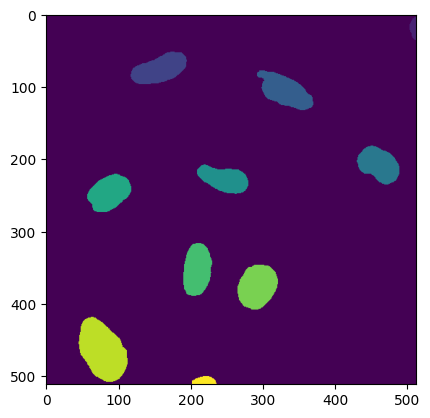

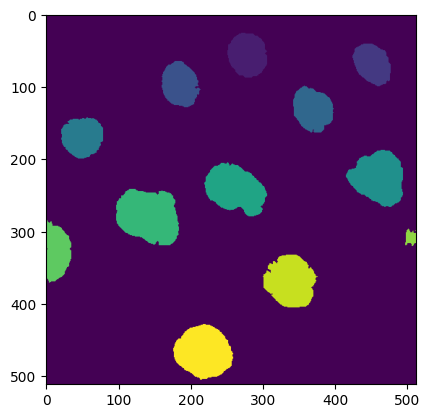

In [8]:
# import stackview
for image_path in image_path_list:
    image = read_and_scale_image('images/' + image_path)
    masks = segment_image(image)
    plt.figure()
    plt.imshow(masks)

Create a folder "segmentations" into which you will write the nuclei segmentations (you can do this outside of jupyter).

For each image, remove the imshow command and instead add a line that saves the segmentation masks into the previously created folder. Use the command `skimage.io.imsave(output_path, masks)` for this.

In [9]:
for image_path in image_path_list:
    image = read_and_scale_image('images/' + image_path)
    masks = segment_image(image)
    skimage.io.imsave('segmentations/' + image_path, masks)

/Users/malbert/miniconda3/envs/pyimagecourse/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load

Check the segmentations folder and open the files in Fiji to check everything is okay.